In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = yf.download(['GOLD', 'MUX', 'VGZ', 'NEM', 'RGLD'], start="2000-01-01", end="2022-03-07")

[*********************100%***********************]  5 of 5 completed


In [3]:
df

Adj Close                                              Close  \
                 GOLD       MUX        NEM        RGLD    VGZ       GOLD   
Date                                                                       
2000-01-03  13.287351  0.185639  17.834435    2.814848  2.500  17.687500   
2000-01-04  13.099543  0.180754  16.491056    2.765466  2.500  17.437500   
2000-01-05  13.334306  0.180754  16.676352    2.765466  1.875  17.750000   
2000-01-06  13.334306  0.180754  16.491056    2.740774  1.875  17.750000   
2000-01-07  13.005642  0.180754  15.888860    2.962997  2.500  17.312500   
...               ...       ...        ...         ...    ...        ...   
2022-02-28  22.570000  0.792000  66.199997  121.260002  0.860  22.570000   
2022-03-01  23.459999  0.771000  69.010002  126.919998  0.840  23.459999   
2022-03-02  23.150000  0.774000  69.790001  126.129997  0.840  23.150000   
2022-03-03  23.570000  0.730000  70.680000  126.690002  0.840  23.570000   
2022-03-04  24.200001  0.800000  74.279999  128.550003  0.870  24.200001   

                                                 ...       Open         \
              MUX        NEM        RGLD    VGZ  ...       GOLD    MUX   
Date                                             ...                     
2000-01-03  0.190  24.062500    3.562500  2.500  ...  17.562500  0.190   
2000-01-04  0.185  22.250000    3.500000  2.500  ...  17.312500  0.185   
2000-01-05  0.185  22.500000    3.500000  1.875  ...  17.562500  0.185   
2000-01-06  0.185  22.250000    3.468750  1.875  ...  17.750000  0.190   
2000-01-07  0.185  21.437500    3.750000  2.500  ...  17.812500  0.185   
...           ...        ...         ...    ...  ...        ...    ...   
2022-02-28  0.792  66.199997  121.260002  0.860  ...  22.879999  0.780   
2022-03-01  0.771  69.010002  126.919998  0.840  ...  22.750000  0.770   
2022-03-02  0.774  69.790001  126.129997  0.840  ...  22.830000  0.780   
2022-03-03  0.730  70.680000  126.690002  0.840  ...  23.120001  0.776   
2022-03-04  0.800  74.279999  128.550003  0.870  ...  23.719999  0.750   

                                            Volume                             \
                  NEM        RGLD    VGZ      GOLD      MUX       NEM    RGLD   
Date                                                                            
2000-01-03  24.000000    3.625000  2.500   1509900    45800    906900   22000   
2000-01-04  23.250000    3.500000  1.875   1787100    13000   1783800    4100   
2000-01-05  22.500000    3.562500  2.500   1285100        0   1180300   42600   
2000-01-06  22.062500    3.562500  2.500   1139300     8500   1688400   45600   
2000-01-07  22.500000    3.546875  2.500   1199900     5100   1528800   11500   
...               ...         ...    ...       ...      ...       ...     ...   
2022-02-28  68.290001  121.239998  0.880  23856300  3318700  13895700  577500   
2022-03-01  66.940002  121.580002  0.860  32082900  2764900   9955800  847200   
2022-03-02  67.669998  124.199997  0.850  23287400  1948700  10780700  568800   
2022-03-03  69.660004  126.500000  0.840  23936800  2755600   8635300  400300   
2022-03-04  70.820000  127.720001  0.860  35834200  4977100  12751300  573800   

                    
               VGZ  
Date                
2000-01-03    8925  
2000-01-04    5050  
2000-01-05    5805  
2000-01-06    2355  
2000-01-07     970  
...            ...  
2022-02-28  464400  
2022-03-01  308100  
2022-03-02  150100  
2022-03-03  163200  
2022-03-04  261900  

[5579 rows x 30 columns]

In [4]:
returns = np.log(1 + df['Adj Close'].pct_change())

In [5]:
returns

,GOLD,MUX,NEM,RGLD,VGZ
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.014235,-0.026668,-0.078313,-0.017699,0.000000
2000-01-05,0.017763,0.000000,0.011173,0.000000,-0.287682
2000-01-06,0.000000,0.000000,-0.011173,-0.008969,0.000000
2000-01-07,-0.024957,0.000000,-0.037200,0.077961,0.287682
...,...,...,...,...,...
2022-02-28,0.000443,0.028171,-0.025356,0.006287,0.035507
2022-03-01,0.038675,-0.026873,0.041571,0.045620,-0.023531
2022-03-02,-0.013302,0.003883,0.011239,-0.006244,0.000000


In [6]:
def portfolio_return(weights):
    return np.dot(returns.mean(), weights)

In [7]:
returns.cov()

,GOLD,MUX,NEM,RGLD,VGZ
GOLD,0.000684,0.000580,0.000534,0.000485,0.000564
MUX,0.000580,0.002910,0.000510,0.000554,0.000788
NEM,0.000534,0.000510,0.000620,0.000466,0.000511
RGLD,0.000485,0.000554,0.000466,0.000892,0.000568
VGZ,0.000564,0.000788,0.000511,0.000568,0.003853


In [8]:
def portfolio_std(weights):
    return ((np.dot(np.dot(returns.cov(), weights), weights))**(1/2))*np.sqrt(252)

In [9]:
def weightscreator(returns):
    rand = np.random.random(len(returns.columns))
    rand /= rand.sum()
    return rand

In [10]:
returns_ = []
std_dev_ = []
weights_ = []

for i in range(2000):
    weights = weightscreator(returns)
    returns_.append(portfolio_return(weights))
    std_dev_.append(portfolio_std(weights))
    weights_.append(weights)

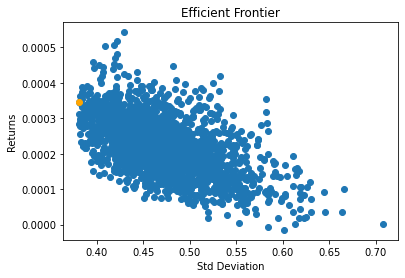

In [11]:
plt.scatter(std_dev_, returns_)

plt.scatter(min(std_dev_), returns_[std_dev_.index(min(std_dev_))], c = 'orange')
plt.title('Efficient Frontier')
plt.xlabel('Std Deviation')
plt.ylabel('Returns')
plt.show()